# week3 事前課題2 住宅情報の分析

## データセットの準備

## 【問題1】データセットの取得

In [1]:
#pd.read_csv()を使用して、変数に格納してください。
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('train.csv')
#print(train_data)
print(train_data.head(4))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml  

## 【問題2】データセット自体の調査
>KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

>Overview
There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81, of which 36 is quantitative, 43 categorical + Id and SalePrice.

>Quantitative: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

>Qualitative: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

(解答)
1460のテストデータ。36の量的、43の質的データから成る。

## 【問題3】データの確認
>データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。
- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [2]:
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


- 今回の目的変数はどの列か確認する。

>SalePrice          int64

- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
print(train_data['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


## 【問題4】欠損値への対応

- 各特徴量の欠損値の有無を確認する。

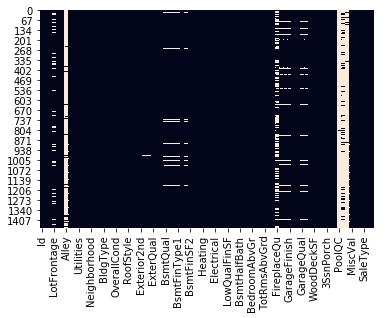

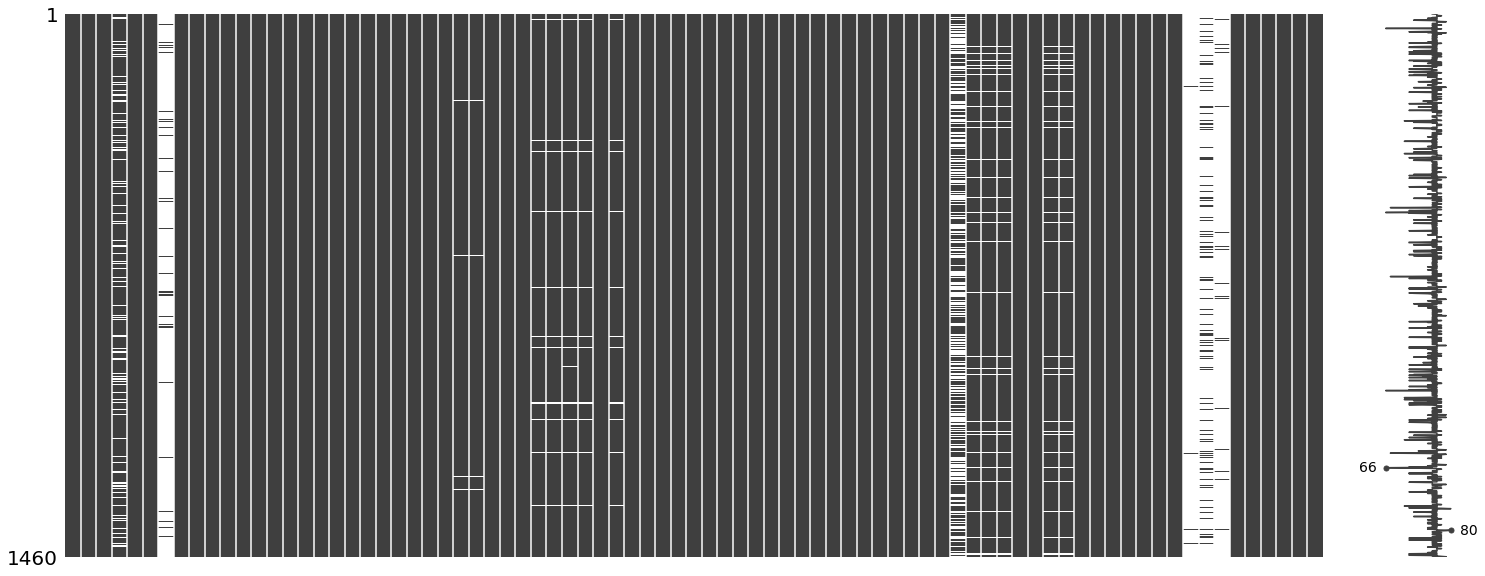

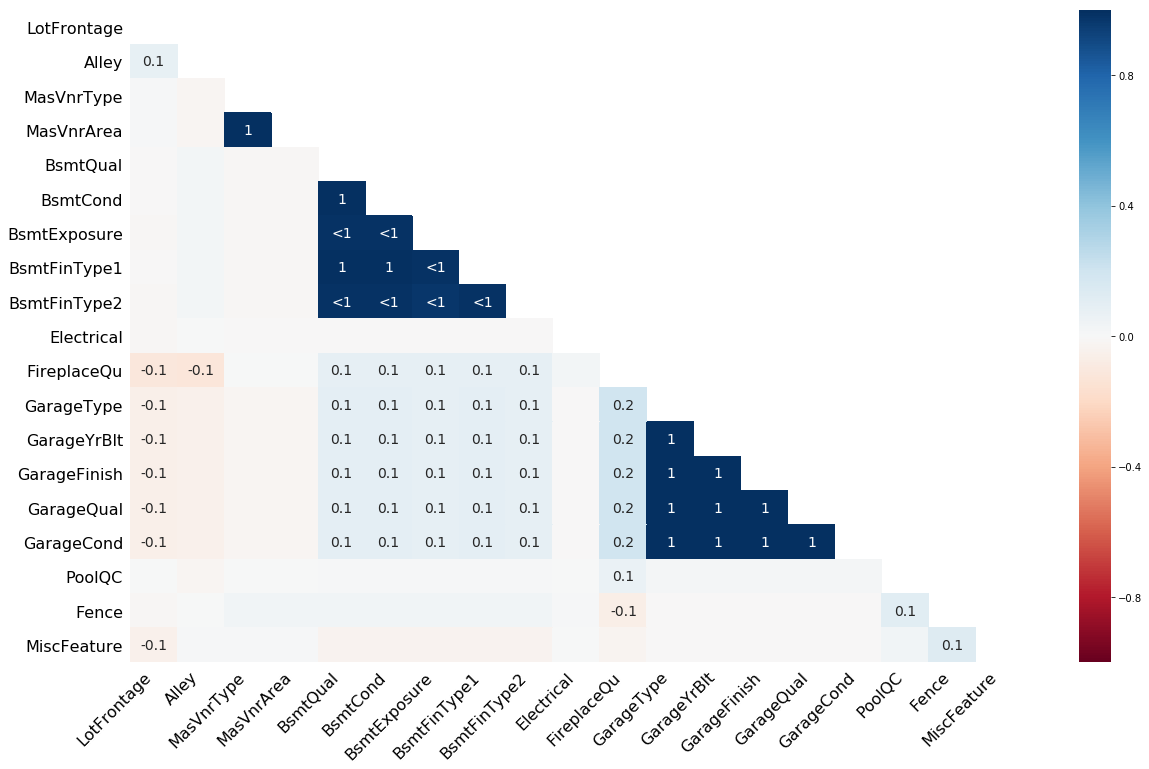

In [6]:
#欠損値の確認にはmissingnoというライブラリを活用しましょう。
#このライブラリにより欠損値の有無が可視化できます。
sns.heatmap(train_data.isnull(), cbar=False)


import missingno as msno

msno.matrix(train_data)
msno.heatmap(train_data)


- 欠損値が何パーセント含まれるかを確認する。

In [37]:
#print(train_data.isnull().sum())

train_data.isnull().apply(lambda col: col.value_counts(),axis=0).fillna(0).astype(np.float).apply(lambda col: col/col.sum(), axis=0)

#欠損率は以下の表のTrue部分

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
False,1.0,1.0,1.0,0.822603,1.0,1.0,0.062329,1.0,1.0,1.0,...,1.0,0.004795,0.192466,0.036986,1.0,1.0,1.0,1.0,1.0,1.0
True,0.0,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,...,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


- 5つ以上欠損値がある特徴量（列）は削除する。

In [23]:
train_data.isnull().apply(lambda 
                        col: col.value_counts(), 
                        axis=0).fillna(0).astype(np.int)

#train_data.dropna(thresh = 5, axis=1)
print(train_data.dropna(thresh = len(train_data)-5, axis=1))

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2        

- 欠損値があるサンプル（行）は削除する。

In [27]:
print(train_data.dropna(how = "any"))

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


## 【問題5】用語の調査
>以下の２つの単語を知る必要があります。これらを調査してまとめてください。
- 尖度
- 歪度

>尖度（せんど、英: kurtosis)は、確率変数の確率密度関数や頻度分布の鋭さを表す数字である。
正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾を持った分布を持ち、尖度が小さければより丸みがかったピークと短く細い尾を持った分布であるという事が判断できる。

>「歪度」とは、分布の歪み度合いを示すものです。 正規分布のように左右対称であるのか、それとも片方の裾だけだ伸びたような歪んだ分布なのか、その度合いを示します。 これを歪度（または歪度係数）といって、歪度が0 よりも大きければ右の裾が長い分布、歪度が0 よりも小さければ左の裾が長い分布となります。 

>(wikipedia)

## 【問題6】分布の確認

>- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

>対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

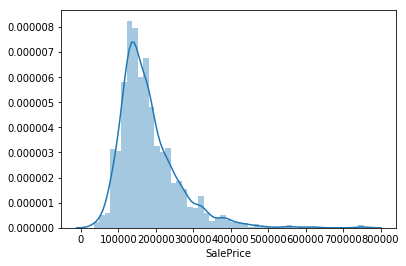

尖度：6.509812011089439
歪度：1.880940746034036


In [42]:
#train_data['SalePrice'].describe()
#seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
import scipy

x = train_data['SalePrice']
sns.distplot(x)
plt.show()

skew = scipy.stats.skew(x) #歪度
kurtosis = scipy.stats.kurtosis(x) #尖度

print("尖度：{}".format(kurtosis))
print("歪度：{}".format(skew))

In [44]:
#目的変数に対して対数変換を行う。
x_log = x.apply(np.log)

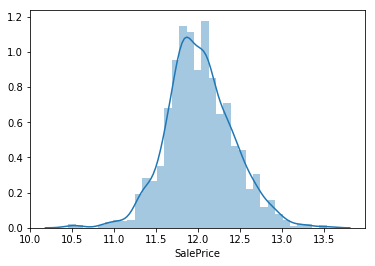

尖度：0.8026555069117713
歪度：0.1212103673013655


In [45]:
#対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
sns.distplot(x_log)
plt.show()

skew_log = scipy.stats.skew(x_log) #歪度
kurtosis_log = scipy.stats.kurtosis(x_log) #尖度

print("尖度：{}".format(kurtosis_log))
print("歪度：{}".format(skew_log))

>対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。

- (解答)
対数変換の前後で、データの分布が偏った分布から正規分布になった。

## 【問題7】相関係数の確認

>特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。
- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

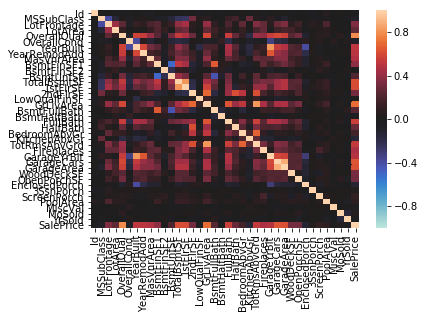

In [58]:
#相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
corr_mat = train_data.corr(method='pearson')


sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

In [65]:
#目的変数との相関の高い特徴量10個
m = np.abs(corr_mat['SalePrice']) #絶対値 np.abs()
m_s = m.sort_values(ascending = False)
#print(m_s)

(解答)
OverallQual      
GrLivArea        
GarageCars       
GarageArea       
TotalBsmtSF      
1stFlrSF         
FullBath         
TotRmsAbvGrd     
YearBuilt        
YearRemodAdd     
(相関係数の絶対値大きい順)

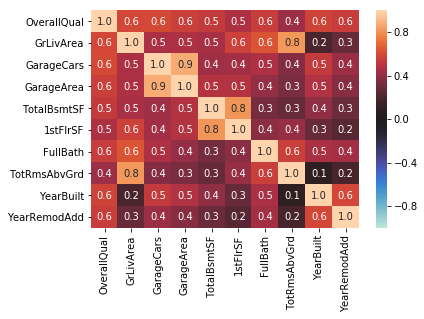

In [86]:
#これらだけの相関係数行列ヒートマップを作る。
df_high_relation = train_data.loc[:,['OverallQual', 
                              'GrLivArea', 
                              'GarageCars',
                              'GarageArea', 
                              'TotalBsmtSF', 
                              '1stFlrSF', 
                              'FullBath', 
                              'TotRmsAbvGrd', 
                              'YearBuilt', 
                              'YearRemodAdd']]
#print(df_high_relation)

corr_high_relation = df_high_relation.corr(method='pearson')


sns.heatmap(corr_high_relation,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_high_relation.columns.values,
            yticklabels=corr_high_relation.columns.values
           )
plt.show()

- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

(解答)
- 'OverallQual'="Overall material and finish quality, 全体の素材、完成度の質", 
- 'GrLivArea'="Above grade (ground) living area square feet,地上部分の面積", 
- 'GarageCars'="Size of garage in car capacity,ガレージの容量",
- 'GarageArea'="Size of garage in square feet,ガレージ面積", 
- 'TotalBsmtSF'="Total square feet of basement area,地下の総面積", 
- '1stFlrSF'="First Floor square feet,一階の面積　*アメリカ英語", 
- 'FullBath'="Full bathrooms above grade,地上部分の総浴室数", 
- 'TotRmsAbvGrd'="Total rooms above grade (does not include bathrooms),地上部分の浴室を除いた部屋数", 
- 'YearBuilt'="Original construction date,建築年", 
- 'YearRemodAdd'="Remodel date,リフォーム日"

- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

(解答)
- GarageArea x GarageCars 0.9,
- GrLivArea x TorRmsAbvGrd 0.8,
- 1stFlrSF x TotalBsmtSF 0.8